In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/laylaalkhoury/Desktop/VE-IA/Engineering-Project/tweets_labelled.csv", delimiter=',')

df.head(5)

,Unnamed: 0,Index,Texte,Media,Interaction,Sujet,Données manquantes,A supprimer
0,0,1618580167122890759,"le_Parisien :\n""« Je me suis sentie humiliée »...",https://video.twimg.com/amplify_video/16185777...,Racine,Loin du VE,False,False
1,1,1618639717305839616,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",NaN,Désaccord,Loin du VE,False,False
2,2,1618867714067693568,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",NaN,Désaccord,Loin du VE,False,False
3,3,1618990967608205314,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",NaN,Désaccord,Loin du VE,False,False
4,4,1619606487214747648,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",NaN,Accord,Loin du VE,False,False


TF-IDF NAIVE BAYES

In [2]:
import numpy as np 
import re

# Supprimer les URL et mentions dans le texte
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Supprimer les liens
    text = re.sub(r"@\S+", "", text)  # Supprimer les mentions
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Supprimer les caractères spéciaux
    text = text.encode('ascii', 'ignore').decode('ascii') # supprimer les emojis
    # text = text.lower()  # Convertir en minuscules
    return text

df['cleaned_text'] = df['Texte'].astype(str).apply(clean_text)

# Mettre les mentions dans une autre colonne et les supprimer du texte
def get_mentions(text):
    mentions = re.findall(r"@\S+", text)
    return mentions

def remove_mentions(text):
    text = re.sub(r"@\S+", "", text)
    return text

df['mentions'] = df['cleaned_text'].apply(get_mentions)
df['cleaned_text'] = df['cleaned_text'].apply(remove_mentions)

In [3]:
df.head()

,Unnamed: 0,Index,Texte,Media,Interaction,Sujet,Données manquantes,A supprimer,cleaned_text,mentions
0,0,1618580167122890759,"le_Parisien :\n""« Je me suis sentie humiliée »...",https://video.twimg.com/amplify_video/16185777...,Racine,Loin du VE,False,False,leParisien \n Je me suis sentie humilie bask...,[]
1,1,1618639717305839616,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",NaN,Désaccord,Loin du VE,False,False,FloPortelli \n Ce qui est dingue cest de porte...,[]
2,2,1618867714067693568,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",NaN,Désaccord,Loin du VE,False,False,SAbdelhamid \n Ce qui est dingue cest quon es...,[]
3,3,1618990967608205314,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",NaN,Désaccord,Loin du VE,False,False,evethefirst \n Personne ne lempche de jouer ...,[]
4,4,1619606487214747648,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",NaN,Accord,Loin du VE,False,False,ChipeauxMylene \n C est tous fait a Dans l...,[]


In [49]:
# visualiser uniquement les caractères spéciaux
def special_characters(text):
    text = re.sub(r"[a-zA-Z\s:'?!]", "", text)
    return text

In [50]:
df.head()

,Unnamed: 0,Index,Texte,Media,Interaction,Sujet,Données manquantes,A supprimer,cleaned_text,mentions
0,0,1618580167122890759,"le_Parisien :\n""« Je me suis sentie humiliée »...",https://video.twimg.com/amplify_video/16185777...,Racine,Loin du VE,False,False,leParisien \n Je me suis sentie humilie bask...,[]
1,1,1618639717305839616,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",NaN,Désaccord,Loin du VE,False,False,FloPortelli \n Ce qui est dingue cest de porte...,[]
2,2,1618867714067693568,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",NaN,Désaccord,Loin du VE,False,False,SAbdelhamid \n Ce qui est dingue cest quon es...,[]
3,3,1618990967608205314,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",NaN,Désaccord,Loin du VE,False,False,evethefirst \n Personne ne lempche de jouer ...,[]
4,4,1619606487214747648,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",NaN,Accord,Loin du VE,False,False,ChipeauxMylene \n C est tous fait a Dans l...,[]


In [58]:
import nltk
from nltk.corpus import stopwords

# Download the French stop words if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

def remove_stop_words(text):
    words = text.split()  # Split text into individual words
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)  # Reassemble the text


# Apply the function to the cleaned text
df['cleaned_text'] = df['cleaned_text'].astype(str).apply(remove_stop_words)

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>


In [59]:
df.head(5)

,Unnamed: 0,Index,Texte,Media,Interaction,Sujet,Données manquantes,A supprimer,cleaned_text,mentions
0,0,1618580167122890759,"le_Parisien :\n""« Je me suis sentie humiliée »...",https://video.twimg.com/amplify_video/16185777...,Racine,Loin du VE,False,False,leParisien Je sentie humilie basketteuse depui...,[]
1,1,1618639717305839616,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",NaN,Désaccord,Loin du VE,False,False,FloPortelli Ce dingue cest porter voile pays s...,[]
2,2,1618867714067693568,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",NaN,Désaccord,Loin du VE,False,False,SAbdelhamid Ce dingue cest quon essaye contrle...,[]
3,3,1618990967608205314,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",NaN,Désaccord,Loin du VE,False,False,evethefirst Personne lempche jouer doit juste ...,[]
4,4,1619606487214747648,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",NaN,Accord,Loin du VE,False,False,ChipeauxMylene C tous fait a Dans sport a rgle...,[]


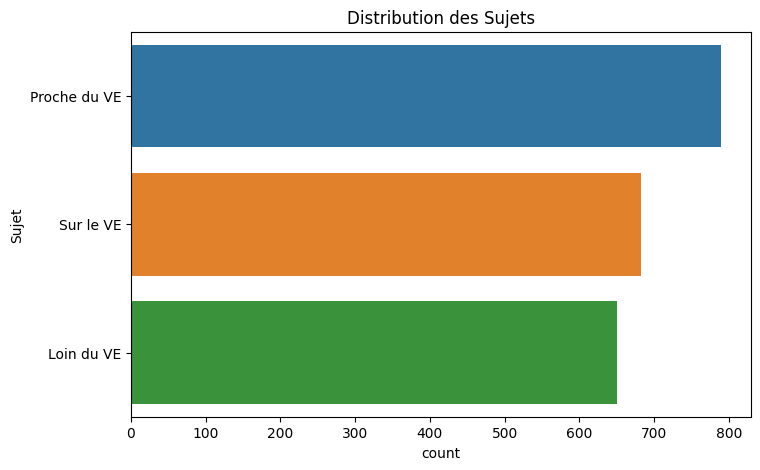

In [60]:
import seaborn as sns 

# Analyse des catégories (distribution des sujets)

plt.figure(figsize=(8, 5))
sns.countplot(y='Sujet', data=df, order=df['Sujet'].value_counts().index)
plt.title("Distribution des Sujets")
plt.show()

In [55]:
df.head(5)

,Unnamed: 0,Index,Texte,Media,Interaction,Sujet,Données manquantes,A supprimer,cleaned_text,mentions
0,0,1618580167122890759,"le_Parisien :\n""« Je me suis sentie humiliée »...",https://video.twimg.com/amplify_video/16185777...,Racine,Loin du VE,False,False,leParisien Je sentie humilie basketteuse depui...,[]
1,1,1618639717305839616,"FloPortelli :\n""@le_Parisien Ce qui est dingue...",NaN,Désaccord,Loin du VE,False,False,FloPortelli Ce dingue cest porter voile pays s...,[]
2,2,1618867714067693568,"SAbdelhamid :\n""@FloPortelli @le_Parisien Ce q...",NaN,Désaccord,Loin du VE,False,False,SAbdelhamid Ce dingue cest quon essaye contrle...,[]
3,3,1618990967608205314,"eve_thefirst :\n""@SAbdelhamid @FloPortelli @le...",NaN,Désaccord,Loin du VE,False,False,evethefirst Personne lempche jouer doit juste ...,[]
4,4,1619606487214747648,"ChipeauxMylene :\n""@eve_thefirst @SAbdelhamid ...",NaN,Accord,Loin du VE,False,False,ChipeauxMylene C tous fait a Dans sport a rgle...,[]


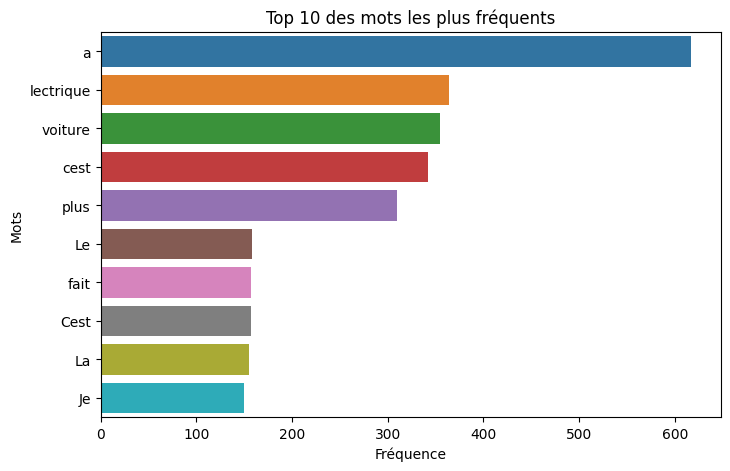

In [61]:
# Fréquences des mots
from collections import Counter

all_words = " ".join(df['cleaned_text']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

# Visualiser les mots les plus fréquents
words, counts = zip(*common_words)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 10 des mots les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Mots")
plt.show()

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [42]:
X = df['cleaned_text']
y = df['Sujet'] 

df = df.dropna(subset=['cleaned_text', 'Sujet'])  # Replace 'label' with your target column name


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF to transform the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6894117647058824

Classification Report:
               precision    recall  f1-score   support

  Loin du VE       0.87      0.40      0.55       129
Proche du VE       0.58      0.82      0.68       154
   Sur le VE       0.78      0.81      0.79       142

    accuracy                           0.69       425
   macro avg       0.74      0.68      0.67       425
weighted avg       0.73      0.69      0.68       425



TF-IDF + SVM 

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'cleaned_text' is the feature and 'label' is the target column
X = df['cleaned_text']
y = df['Sujet']  # Change this to the actual column name for labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF to transform the text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')  # Using linear kernel for text classification
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7294117647058823

Classification Report:
               precision    recall  f1-score   support

  Loin du VE       0.69      0.66      0.67       129
Proche du VE       0.64      0.75      0.69       154
   Sur le VE       0.91      0.77      0.83       142

    accuracy                           0.73       425
   macro avg       0.75      0.73      0.73       425
weighted avg       0.74      0.73      0.73       425

